In [3]:
%matplotlib_svg
%config InlineBackend.close_figures = False
import numpy as np
from matplotlib import pyplot as plt

## Artist对象

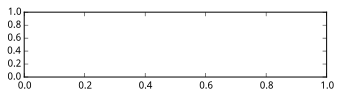

In [4]:
#%nofig
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])

In [5]:
line = ax.plot([1, 2, 3], [1, 2, 1])[0]  # 返回的是只有一个元素的列表
print((line is ax.lines[0]))

True


In [6]:
ax.set_xlabel("time");

In [7]:
print((ax.xaxis))
print((ax.xaxis.label))
print((ax.xaxis.label._text))

XAxis(72.000000,24.000000)
Text(0.5,2.2,u'time')
time


In [8]:
ax.get_xaxis().get_label().get_text()

u'time'

### Artist的属性

In [10]:
#%hide_output
fig = plt.figure()
fig.patch.set_color("g") # 设置背景颜色为绿色

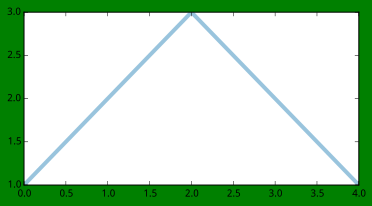

In [11]:
#%nofig
line = plt.plot([1, 2, 3, 2, 1], lw=4)[0]
line.set_alpha(0.5)

In [ ]:
line.set(alpha=0.5, zorder=2);

In [13]:
%omit plt.getp(fig.patch)

    aa = False
    agg_filter = None
    alpha = None
    animated = False
    ...

In [14]:
#%hide
plt.close("all")

### Figure容器

True


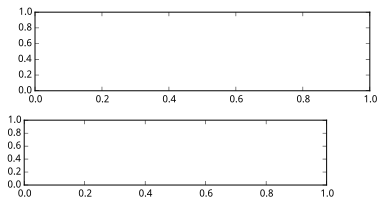

In [15]:
#%nofig
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])
print((ax1 in fig.axes and ax2 in fig.axes))

In [16]:
for ax in fig.axes:
    ax.grid(True)

In [17]:
#%hide
plt.close("all")

In [18]:
#%hide_output
from matplotlib.lines import Line2D
fig = plt.figure()
line1 = Line2D(
    [0, 1], [0, 1], transform=fig.transFigure, figure=fig, color="r")
line2 = Line2D(
    [0, 1], [1, 0], transform=fig.transFigure, figure=fig, color="g")
fig.lines.extend([line1, line2])

C:\WinPython-32bit-2.7.5.3\python-2.7.5\lib\site-packages\IPython\core\formatters.py:239: FormatterWarning: Exception in image/svg+xml formatter: 
  FormatterWarning,


### Axes容器

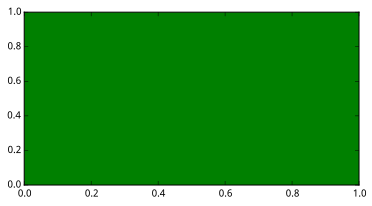

In [22]:
#%nofig
fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor("green")

In [23]:
x, y = np.random.rand(2, 100)
line = ax.plot(x, y, "-", color="blue", linewidth=2)[0]
line is ax.lines[0]

True

True

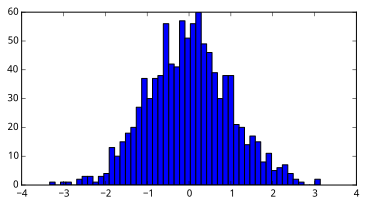

In [24]:
#%nofig
fig, ax = plt.subplots()
n, bins, rects = ax.hist(np.random.randn(1000), 50, facecolor="blue")
rects[0] is ax.patches[0]

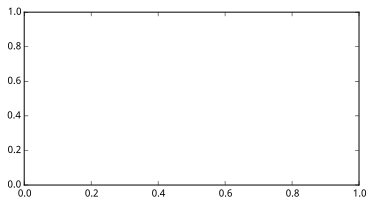

In [8]:
#%nofig
fig, ax = plt.subplots()
rect = plt.Rectangle((1,1), width=5, height=12)

In [30]:
ax.add_patch(rect) # 将rect添加进ax
rect.get_axes() is ax

True

In [31]:
print((ax.get_xlim())) # ax的X轴范围为0到1，无法显示完整的rect
print((ax.dataLim._get_bounds())) # 数据的范围和rect的大小一致
ax.autoscale_view() # 自动调整坐标轴范围
print((ax.get_xlim())) # 于是X轴可以完整显示rect

(0.0, 1.0)
(1.0, 1.0, 5.0, 12.0)
(1.0, 6.0)


<matplotlib.collections.PathCollection object at 0x082339B0> True


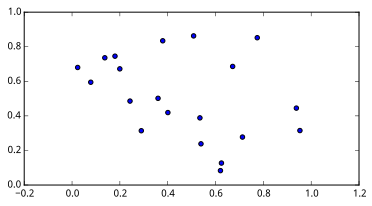

In [20]:
#%nofig
fig, ax = plt.subplots()
t = ax.scatter(np.random.rand(20), np.random.rand(20))
print((t, t in ax.collections))

### Axis容器

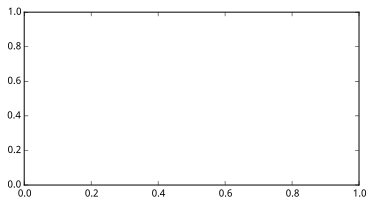

In [23]:
#%nofig
fig, ax = plt.subplots()
axis = ax.xaxis

In [24]:
axis.get_ticklocs() 

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [25]:
print((axis.get_ticklabels())) # 获得刻度标签列表
print([x.get_text() for x in axis.get_ticklabels()]) # 获得刻度的文本字符串

<a list of 6 Text major ticklabel objects>
[u'0.0', u'0.2', u'0.4', u'0.6', u'0.8', u'1.0']


In [26]:
axis.get_ticklines() 

<a list of 12 Line2D ticklines objects>

In [27]:
axis.get_ticklines(minor=True) # 获得副刻度线列表

<a list of 0 Line2D ticklines objects>

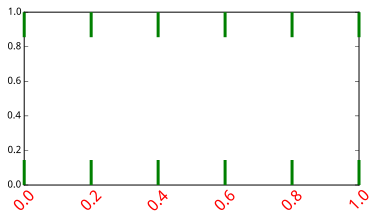

In [28]:
#%fig=配置X轴的刻度线和刻度文本的样式
for label in axis.get_ticklabels():
    label.set_color("red")
    label.set_rotation(45)
    label.set_fontsize(16)
     
for line in axis.get_ticklines():
    line.set_color("green")
    line.set_markersize(25)
    line.set_markeredgewidth(3)
fig

In [29]:
print((axis.get_minor_locator())) # 计算副刻度位置的对象
print((axis.get_major_locator())) # 计算主刻度位置的对象

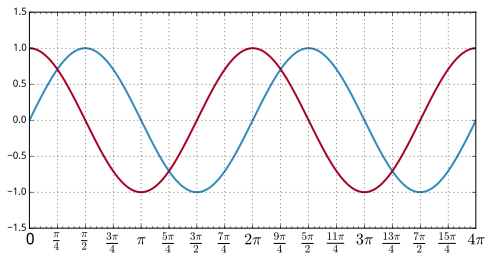

In [39]:
#%fig=配置X轴的刻度线的位置和文本，并开启副刻度线
from fractions import Fraction
from matplotlib.ticker import MultipleLocator, FuncFormatter #❶
x = np.arange(0, 4*np.pi, 0.01)
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(x, np.sin(x), x, np.cos(x))

def pi_formatter(x, pos): #❷
    frac = Fraction(int(np.round(x / (np.pi/4))), 4)
    d, n = frac.denominator, frac.numerator
    if frac == 0:
        return "0"
    elif frac == 1:
        return "$\pi$"
    elif d == 1:
        return r"${%d} \pi$" % n
    elif n == 1:
        return r"$\frac{\pi}{%d}$" % d
    return r"$\frac{%d \pi}{%d}$" % (n, d)

# 设置两个坐标轴的范围
plt.ylim(-1.5,1.5)
plt.xlim(0, np.max(x))

# 设置图的底边距
plt.subplots_adjust(bottom = 0.15)

plt.grid() #开启网格

# 主刻度为pi/4
ax.xaxis.set_major_locator( MultipleLocator(np.pi/4) ) #❸

# 主刻度文本用pi_formatter函数计算
ax.xaxis.set_major_formatter( FuncFormatter( pi_formatter ) ) #❹

# 副刻度为pi/20
ax.xaxis.set_minor_locator( MultipleLocator(np.pi/20) ) #❺

# 设置刻度文本的大小
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)

### Artist对象的关系

> **SOURCE**

> `scpy2.common.GraphvizMatplotlib`：将matplotlib的对象关系输出成如`ref:fig-next`所示的关系图。

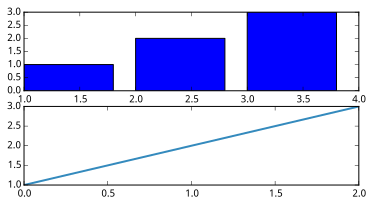

In [42]:
#%nofig
fig = plt.figure()
plt.subplot(211)
plt.bar([1, 2, 3], [1, 2, 3])
plt.subplot(212)
plt.plot([1, 2, 3]);

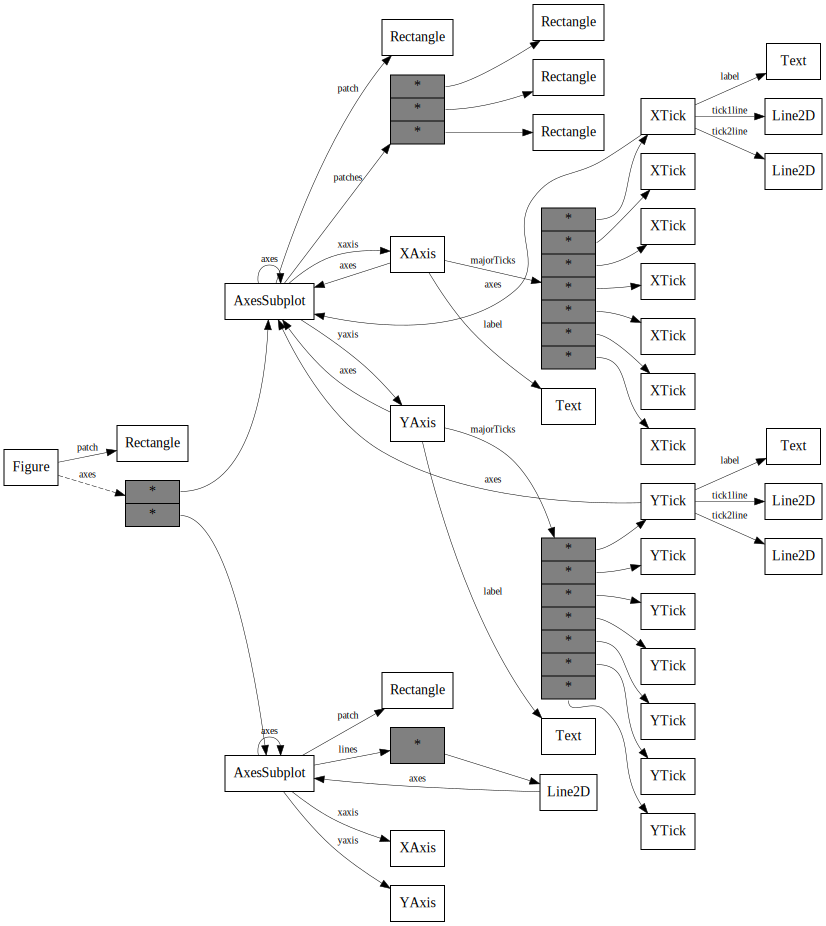

In [43]:
#%fig=使用GraphvizMatplotlib生成图表对象中各个Artist对象之间的关系图
from scpy2.common import GraphvizMatplotlib
%dot GraphvizMatplotlib.graphviz(fig)